## From [cs.toronto.edu](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html#:~:text=The%20Boston%20Housing%20Dataset,the%20area%20of%20Boston%20Mass)
Variables
    There are 14 attributes in each case of the dataset. They are:

        CRIM - per capita crime rate by town
        ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
        INDUS - proportion of non-retail business acres per town.
        CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
        NOX - nitric oxides concentration (parts per 10 million)
        RM - average number of rooms per dwelling
        AGE - proportion of owner-occupied units built prior to 1940
        DIS - weighted distances to five Boston employment centres
        RAD - index of accessibility to radial highways
        TAX - full-value property-tax rate per $10,000
        PTRATIO - pupil-teacher ratio by town
        B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        LSTAT - % lower status of the population
        MEDV - Median value of owner-occupied homes in $1000's

# Wrangling, Cleaning & Analysis

In [1]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [2]:
# Assigning imported data to variables
raw_housing_data = pd.read_csv('HousingData.csv')
housing_data = raw_housing_data.copy()

In [3]:
raw_housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
raw_housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Finding Null Values
for col in raw_housing_data.columns:
    print('Total Null Values, {}: {}'.format(col ,506 - raw_housing_data[col].count()))

Total Null Values, CRIM: 20
Total Null Values, ZN: 20
Total Null Values, INDUS: 20
Total Null Values, CHAS: 20
Total Null Values, NOX: 0
Total Null Values, RM: 0
Total Null Values, AGE: 20
Total Null Values, DIS: 0
Total Null Values, RAD: 0
Total Null Values, TAX: 0
Total Null Values, PTRATIO: 0
Total Null Values, B: 0
Total Null Values, LSTAT: 20
Total Null Values, MEDV: 0


<AxesSubplot:>

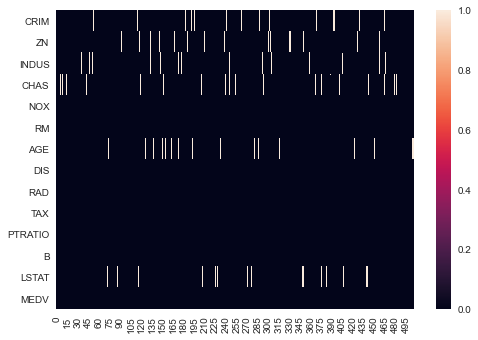

In [6]:
# Creating a heatmap of the above null values
null_housing_data = raw_housing_data.isnull()
sns.heatmap(null_housing_data.transpose())

In [7]:
# Looping over the dataset applying mean imputation to the missing data
for col in housing_data.columns:
    if housing_data[col].isnull().sum():                                                # 0 = False, Any non-zero = True => complete data is ignored.
        housing_data[col][housing_data[col].isnull()] = raw_housing_data[col].mean()
        print('Finished Mean Imputation For: {}'.format(col))

# This operation raises SettingWithCopyWarning because the loop operates upon slices of housing_data which is a copy of the original raw_housing_data dataframe.

Finished Mean Imputation For: CRIM
Finished Mean Imputation For: ZN
Finished Mean Imputation For: INDUS
Finished Mean Imputation For: CHAS
Finished Mean Imputation For: AGE
Finished Mean Imputation For: LSTAT


<ipython-input-7-8bc87d4e44d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_data[col][housing_data[col].isnull()] = raw_housing_data[col].mean()


In [8]:
# Verifying there is no more missing data
for col in housing_data.columns:
    print('Total Null Values, {}: {}'.format(col ,506 - housing_data[col].count()))

Total Null Values, CRIM: 0
Total Null Values, ZN: 0
Total Null Values, INDUS: 0
Total Null Values, CHAS: 0
Total Null Values, NOX: 0
Total Null Values, RM: 0
Total Null Values, AGE: 0
Total Null Values, DIS: 0
Total Null Values, RAD: 0
Total Null Values, TAX: 0
Total Null Values, PTRATIO: 0
Total Null Values, B: 0
Total Null Values, LSTAT: 0
Total Null Values, MEDV: 0


In [9]:
crim_mean_diff = raw_housing_data['CRIM'].mean() - housing_data['CRIM'].mean()

print('Very low mean deviation between the raw data with nulls and the imputed dataset: {}'.format(crim_mean_diff))

Very low mean deviation between the raw data with nulls and the imputed dataset: -4.440892098500626e-16


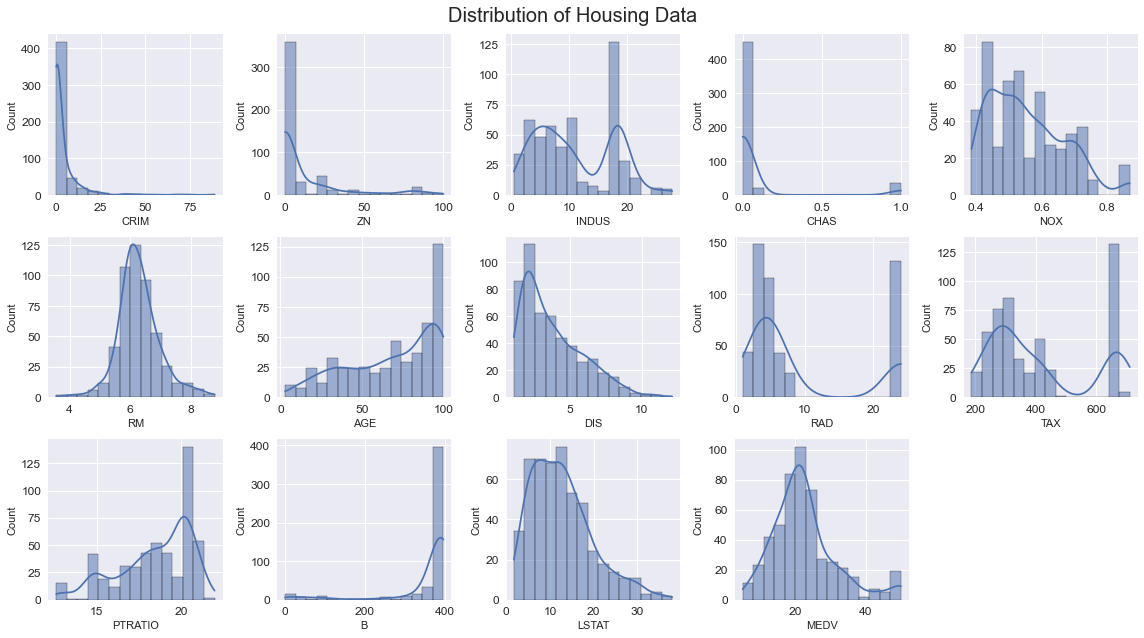

In [10]:
# Setting up a grid of graphs
grid, ax = plt.subplots(nrows= 3, ncols= 5, figsize= (16, 9))
grid.suptitle('Distribution of Housing Data', fontsize= 20)


# Looping over features, plotting distribution
graph = 0
for y in range(3):
    for x in range(5):
        # ax[y][x].hist(data= housing_data, x= housing_data.columns[graph])  Inefficient lines of code from first attampt at the multi-plot below.
        # ax[y][x].set_title(housing_data.columns[graph])                     ||            ||          ||          ||          ||          ||
        sns.histplot(data= housing_data, x= housing_data.columns[graph], kde= True, bins= 15 ,ax= ax[y][x])
        ax[y][x].tick_params(axis= 'both', labelsize= 12)
        if graph == 13:
            break
        graph += 1

ax[2][4].set_visible(False)
grid.tight_layout()

In [11]:
corr = housing_data.corr()

In [12]:
# Filtering by only highly correlated features
corr[(corr.abs() > 0.6) & (corr.abs() < 1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608886,NaN,NaN,NaN,NaN,NaN
ZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.638388,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,NaN,NaN,0.740965,NaN,0.614592,-0.699639,NaN,0.716062,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.740965,NaN,NaN,NaN,0.711461,-0.769230,0.611441,0.668023,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.602962,0.695360
AGE,NaN,NaN,0.614592,NaN,0.711461,NaN,NaN,-0.724353,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,0.638388,-0.699639,NaN,-0.769230,NaN,-0.724353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RAD,0.608886,NaN,NaN,NaN,0.611441,NaN,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.716062,NaN,0.668023,NaN,NaN,NaN,0.910228,NaN,NaN,NaN,NaN,NaN


In [13]:
# |Correlation| threshold arbitrarily set to 0.3
influential_variables = corr['MEDV'].abs() >= 0.3
to_drop = list(influential_variables[influential_variables == False].index)
to_drop.append('MEDV')
to_drop

['CHAS', 'DIS', 'MEDV']

<AxesSubplot:>

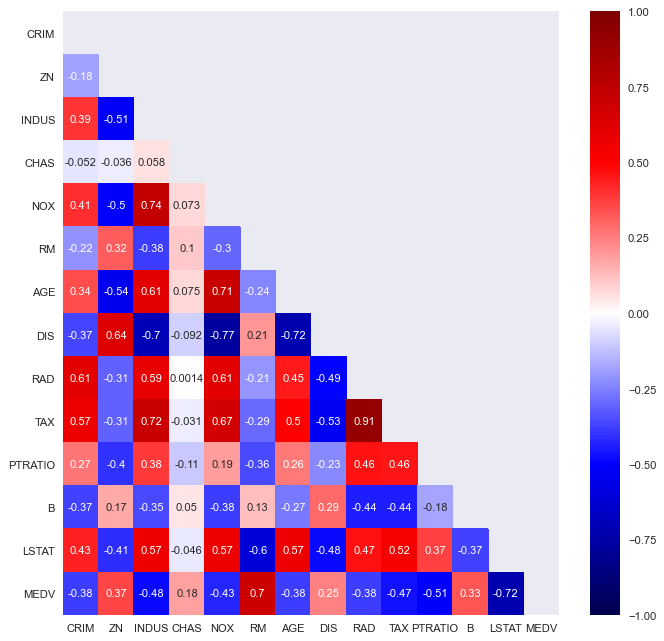

In [14]:
fig = plt.figure(figsize= (10, 10), dpi= 80)
sns.heatmap(corr, annot= True, mask= np.triu(corr), center= 0, vmax= 1, vmin= -1, cmap= 'seismic')

## Observations of the above:
Looking spesifically at the correlation between MEDV - which is the price of the house, and the other factors on that row

CRIM: Higher per capita crime rate negatively impacts average house price

ZN: Higher square footage of a housing plot is positively associated with average house price

INDUS: A heavy industry presence in the same town as a house for sale has a negative impact upon the house price
    It is also worth noting here that INDUS and NOX share a very strong positive correlation.
    Intuitively, I would believe that this is due to a cause-effect relationship between high industrial presence and the concentration of nitric oxides

CHAS: A dummy variable signifying if the property bounds the Charles river or not. Strangely, there is a positive correlation between the river bounds dummy variable and 
      the median house price, I would have expected to see a negative correlation here due to risk of flooding.

NOX: Concentration of nitric oxides in the air has a negative correlation with average house price

RM: The number of rooms a house has is very strongly positively correlated with the average price of houses.

AGE: counterintuitivley, this is not the exact age of the house, but a proportion of houses in the area that were built before 1940, This has a negative correlation with 
     median house price, This may be because of a building standards ammendment at that time or expected lifespan of a house.

DIS: The weighted distance to 5 emplotment centres is positively correlated with the price of a house.

RAD: The indexed accessibility to radial highways, various other publications surrounding this data / data of boston indicate that a higher value indicates higher accessibility, having better access to a highway is negatively associated with house price, This could be due to the disturbances and negative impacts of being close to a highway, noise & air pollution, traffic, etc.

TAX: Simple enough, if you have to pay more tax on a house it becomes less valuable. Tax has a negative correlation to house price

PTRATIO: The ratio of students to teachers in the area. It is quite strongly negatively correlated with median house price which suggests that as the pupil-teacher ratio increases ie- ceteris paribus, more pupils or less teachers, The median value of properties in that area will decrease.

B: The proportion of black people by town - This is a historic dataset that was published in 1978, I am treating it as such. B has a positive correlation with the median house price, I explore the mechanics of B in the cell below

LSTAT: '% lower status of the population' is quite vague however, I suspect it refers to the proportion of people of low socioeconomic status of the population of a town, it is very strongly negatively correlated to the median house price


## Deep Dive into the nature of B:
B is calculated using the following equation: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town.
To make my analysis of the equation a little less complicated, I am going to ignore the fact that other types of people exist.
          
Examining both extremes of this equation:

     Bk = 1: 1000(0.37)^2  = 1369 - This represents an all-black town
     
     Bk = 0: 1000(-0.63)^2 = 3969 - This represents a non-black town

Since B is positively correlated with median house price it would suggest that, if we only consider this variable, houses are at their most valuable in these 'model' segregated towns, however, the magnitude to which this equation is maximized differs between the two extreme scenarios, suggesting that, if two identical houses were for sale in two identical towns, the only difference being that one town was all white people and the other was all black people, the price for the two houses would differ, the white house would be more expensive while the black house less so.

The interesting thing about the equation is in the -0.63 offset since this directly subtracts from the proportion of black people in a town, effect of the increase of housing prices is at it's least positive ie- minimum when the proportion of black people in a town is equal to the offset. 

When Bk < 0.63 the marginal effect of another black person in the town will reduce house prices.
               the marginal effect of another white person in the town will increase house prices.

When Bk > 0.63 the marginal effect of another black person in the town will increase house prices.
               the marginal effect of another white person in the town will reduce house prices.

The existance of this equation in it's context elude to commentary about racial distribution and interactions between mixed groups that I am nowhere near knowledgeable enough to draw unbiased inferences from.

# Modeling

In [15]:
# Importing modelling libraries
import rfpimp
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score

In [16]:
x = housing_data.drop(columns= to_drop)
y = housing_data['MEDV'].copy()

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .33, random_state= 3)

## Model 1: Linear Regression

In [18]:
# Importing the model
from sklearn.linear_model import LinearRegression

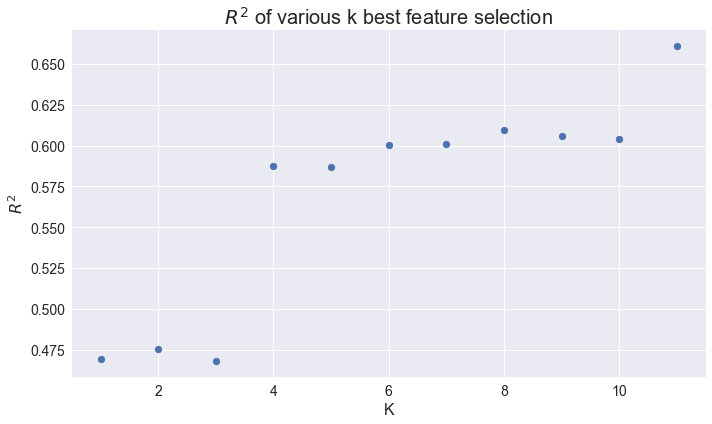

In [19]:
fig, ax = plt.subplots(figsize= (10, 6))

ax.set_title('$R^2$ of various k best feature selection', fontsize= 20)
ax.set_ylabel('$R^2$', fontsize= 16)
ax.set_xlabel('K', fontsize= 16)
ax.tick_params(labelsize= 14)

k_best_features =[]
for k in range(1,12):
    # Setting up the pipeline
    linearpipe = Pipeline([
        ('selKBest', SelectKBest(k= k)),
        ('lreg', LinearRegression())
    ])

    # Fitting linear model
    linearpipe.fit(x_train, y_train)

    k_best_features.append([k, r2_score(y_test, linearpipe.predict(x_test))])

k_best, r2score = zip(*k_best_features)
# Plotting the R2 on a scatter to aid with optimal feature selection
ax.scatter(k_best, r2score)
fig.tight_layout()


In [20]:
# Using best K features from above
linearpipe = Pipeline([
        ('selKBest', SelectKBest(k= 11)),
        ('lreg', LinearRegression())
    ])

# Fitting linear model
linearpipe.fit(x_train, y_train)

# Printing model scores
# Under ideal circumstances the R2 and Explained variance will be identical while the Error is relatively small
print('R2 Score:', r2_score(y_test, linearpipe.predict(x_test)))
print('Explained Variance', explained_variance_score(y_test, linearpipe.predict(x_test)))
print('Negative Mean Absolute Error:', mean_absolute_error(y_test, linearpipe.predict(x_test)))

R2 Score: 0.6609599860509455
Explained Variance 0.6615214142445065
Negative Mean Absolute Error: 3.868260528343626


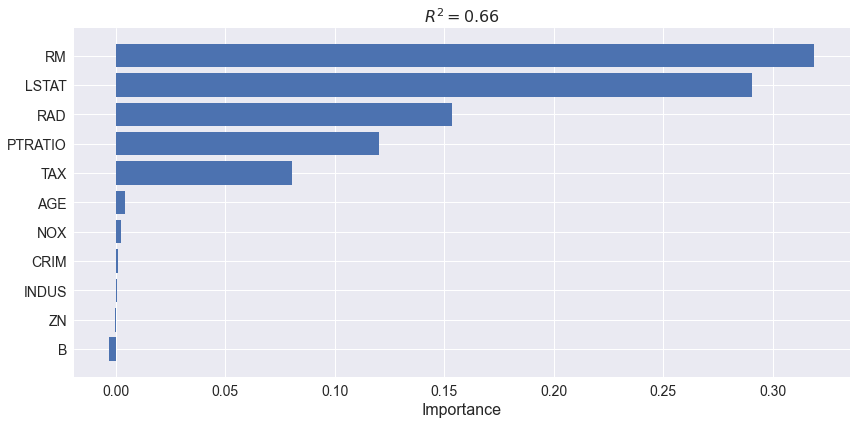

In [21]:
# Assessing feature importance (Represented as the fraction of the R2 score in which each feature contributes)
importance = rfpimp.importances(linearpipe, x_test, y_test)

fig, ax = plt.subplots(figsize= (12, 6))

ax.barh(importance.index, importance['Importance'])
ax.set_xlabel('Importance', fontsize= 16)
ax.set_title('$R^2= %.2f$' % r2_score(y_test, linearpipe.predict(x_test)), fontsize= 16)
ax.tick_params(axis= 'both', labelsize= 14)
plt.gca().invert_yaxis()
fig.tight_layout()

## Model 2: Decision Tree Regressor

In [62]:
# Importing the model
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [145]:
# instantiate the instance of the model
decision_tree =  DecisionTreeRegressor(random_state= 3)

# generating parameter grid
decision_tree_param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [None, 1, 2, 3, 4, 5],
    'min_samples_split': [5, 10, 15, 20]
}

# cost-complexity pruning parameters - will be used to find optimal alpha to prune tree
path = decision_tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

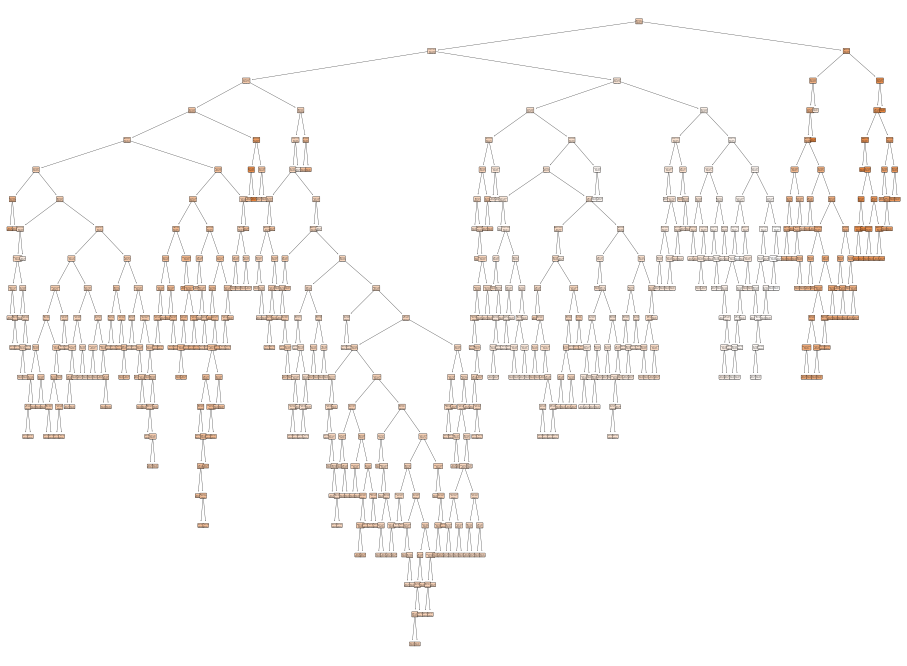

In [146]:
decision_tree.fit(x_train, y_train)

plt.subplots(figsize= (16, 12))
plot_tree(decision_tree, filled= True, rounded= True, feature_names= x.columns);        # It goes without saying this is going to grossly overfit the training data

In [64]:
decision_trees = []

# looping over alphas obtained in cell above -- excluding the last value since that value prunes the tree to a single node.
for ccp_alpha in ccp_alphas[:-1]:
    decision_tree_alpha = DecisionTreeRegressor(random_state= 3, ccp_alpha= ccp_alpha)      # generating a tree for each alpha
    decision_tree_alpha.fit(x_train, y_train)                                               # fitting each tree to the training data
    decision_trees.append(decision_tree_alpha)                                              # adding the trees to a list for comparison in the next cell

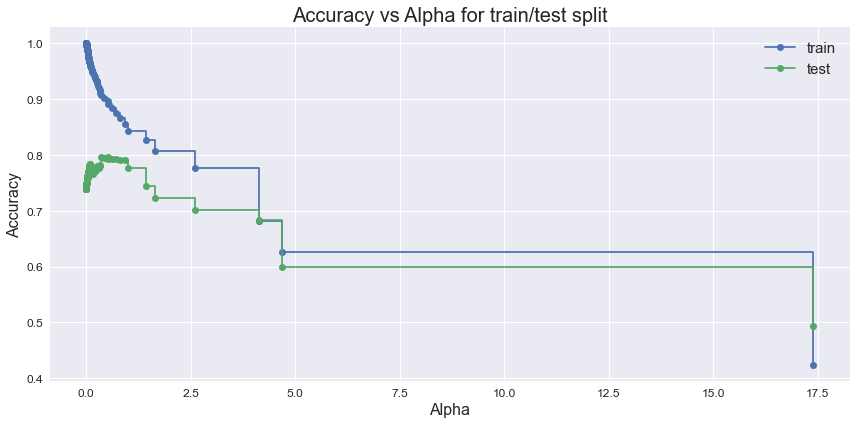

In [65]:
# scoring each decision tree that was created in the cell above. Scoring performance on training and testing data
decision_tree_train_scores = [decision_tree.score(x_train, y_train) for decision_tree in decision_trees]
decision_tree_test_scores = [decision_tree.score(x_test, y_test) for decision_tree in decision_trees]

fig, ax = plt.subplots(figsize = (12, 6))   # setting up axis

ax.set_xlabel('Alpha', fontsize= 16)
ax.set_ylabel('Accuracy', fontsize= 16)
ax.set_title('Accuracy vs Alpha for train/test split', fontsize= 20)
ax.tick_params(labelsize= 12)

ax.plot(ccp_alphas[:-1], decision_tree_train_scores, marker= 'o', label= 'train', drawstyle= 'steps-post')  # plotting scores
ax.plot(ccp_alphas[:-1], decision_tree_test_scores, marker= 'o', label= 'test', drawstyle= 'steps-post')

ax.legend(fontsize= 15)
fig.tight_layout()

<AxesSubplot:xlabel='tree'>

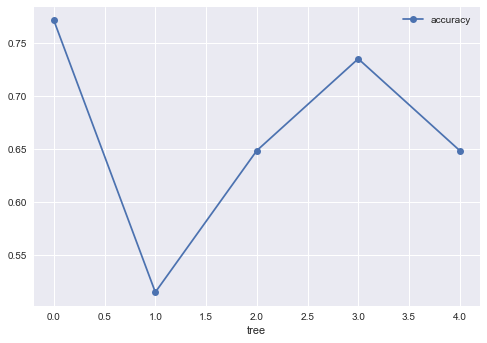

In [67]:
decision_tree = DecisionTreeRegressor(random_state= 3, ccp_alpha= 1.5)              # creating a decision tree regressor with a cost-complexity pruning alpha of 1.5
cv_scores = cross_val_score(decision_tree, x_train, y_train, cv= 5)                 # generating a plot of the accuracy of each split of the testing data.
cv_tree_scores = pd.DataFrame(data= {'tree': range(5), 'accuracy': cv_scores})
cv_tree_scores.plot(x= 'tree', y= 'accuracy', marker= 'o')

In [127]:
cv_alpha = []

for ccp_alpha in ccp_alphas[:-1]:                                                   # largely the same method of looping as a few cells prior however, generating cross validation scores instead.
    decision_tree = DecisionTreeRegressor(random_state= 3, ccp_alpha= ccp_alpha)      
    cv_scores = cross_val_score(decision_tree, x_train, y_train, cv= 5)
    cv_alpha.append([ccp_alpha, np.mean(cv_scores)])

alpha_results = pd.DataFrame(cv_alpha, columns= ['alpha', 'mean_accuracy'])         # assigning the scores from the cross validation to a dataframe to be used in alpha selection below

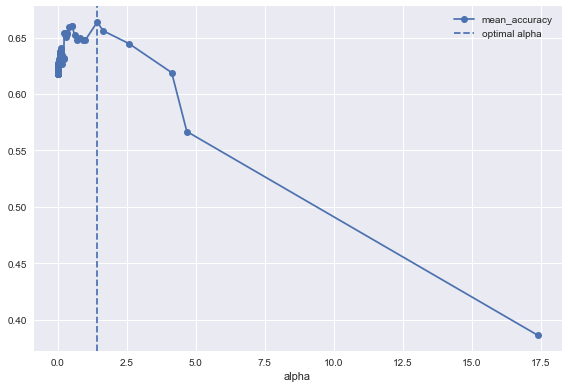

In [134]:
alpha_results.plot(x= 'alpha', y= 'mean_accuracy', marker= 'o')     # plotting mean accuracy and alpha values
plt.axvline(x= float(alpha_results['alpha'][alpha_results['mean_accuracy'] == alpha_results['mean_accuracy'].max()]), linestyle= '--', label= 'optimal alpha')  # vertical line at alpha of highest accuracy

plt.legend()
plt.tight_layout()

In [135]:
alpha_results[(alpha_results['alpha'] >= 0) & (alpha_results['alpha'] <= 2.5)].sort_values('mean_accuracy', ascending= False).head()

,alpha,mean_accuracy
299,1.436908,0.663721
293,0.529459,0.660206
292,0.520384,0.660206
291,0.420053,0.658914
300,1.647083,0.656065


In [136]:
optimal_alpha = alpha_results['alpha'][alpha_results['mean_accuracy'] == alpha_results['mean_accuracy'].max()]
optimal_alpha = float(optimal_alpha)
optimal_alpha

1.4369080088112547

In [137]:
# Building pruned tree
pruned_decision_tree = DecisionTreeRegressor(random_state= 3, ccp_alpha= optimal_alpha)
pruned_decision_tree = pruned_decision_tree.fit(x_train, y_train)

In [138]:
print('R2 Score:', r2_score(y_test, pruned_decision_tree.predict(x_test)))
print('Explained Variance', explained_variance_score(y_test, pruned_decision_tree.predict(x_test)))
print('Negative Mean Absolute Error:', mean_absolute_error(y_test, pruned_decision_tree.predict(x_test)))

R2 Score: 0.7445401762140437
Explained Variance 0.7451664911076417
Negative Mean Absolute Error: 3.26936908948205


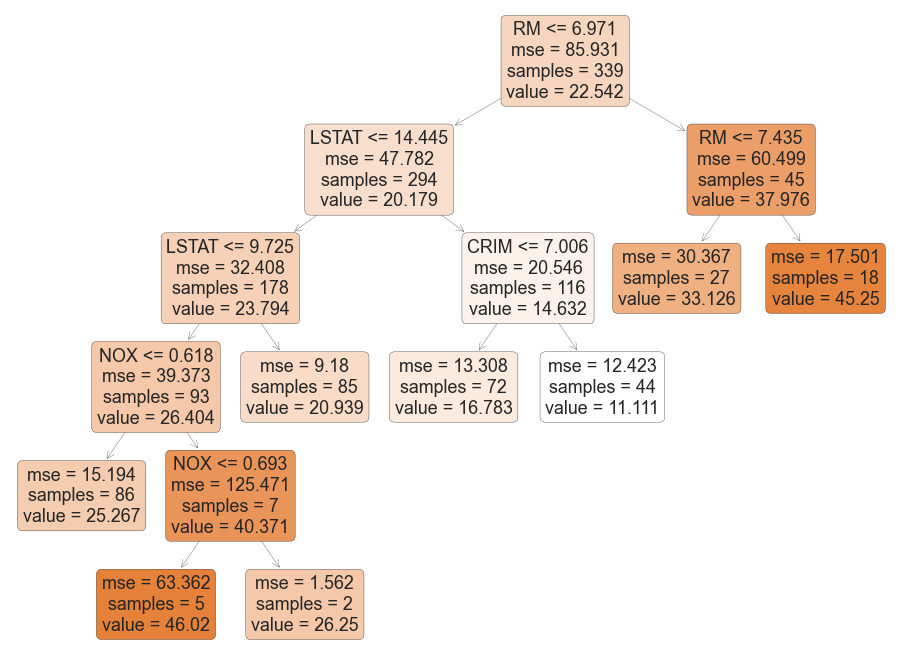

In [144]:
plt.figure(figsize= (16, 12))
plot_tree(pruned_decision_tree, filled= True, rounded= True, feature_names= x.columns);